### 선형회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

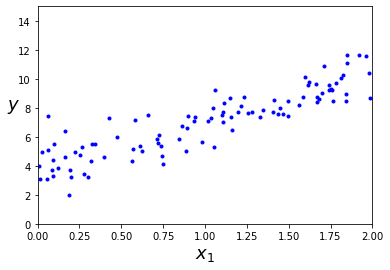

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

모델을 훈련시킨다는 것은 모델이 훈련세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어 맞는지 츠정해야 한다. 회귀 에서 가장 널리 사용되는 성능지표는 RMSE인데 이를 최소화하는 세타를 찾아야 한다.  
실제로는 RMSE보다 MSE를 최소하는것이 같은 결과를 내면서 더 간단하다.

### 정규 방정식
비용함수를 최소화하는 세터값을 찾기 위한 해석적인 방법이 있다. 다른 말로 하면 바로 결과를 얻을 수 있는 수학공식이 있다. 이를 정규방정식이라고 한다.

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$  
세타햇은 비용함수를 최소화하는 세타  
y는 y1부터 ym까지 포함하는 타깃 벡터 

 넘파이 선형대수 모델 np.linalg에 있는 inv함수를 통해 역행렬을 계산하고 dot()메서드를 통해 행렬 곱셈을 진행  
 np.c_ 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기

In [9]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 X0 =1 를 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[3.77981228],
       [3.2365191 ]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 X0 =1 를 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.77981228],
       [10.25285047]])

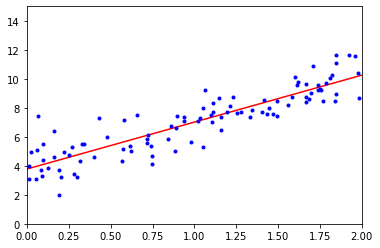

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [16]:
reg.intercept_ , reg.coef_

(array([3.77981228]), array([[3.2365191]]))

In [17]:
reg.predict(X_new)

array([[ 3.77981228],
       [10.25285047]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있다

In [18]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 쓴다

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.77981228],
       [3.2365191 ]])

이 함수는  𝐗+𝐲 을 계산합니다.  𝐗+ 는  𝐗 의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있다

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [19]:
np.linalg.pinv(X_b).dot(y)

array([[3.77981228],
       [3.2365191 ]])

### 경사하강법(gradient descent, GD) 
여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 경사하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

짙은 안개 때문에 산속에서 길을 잃었다고 가정해보자 발밑 지면의 기울기만 느낄 수 있다. 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것이다. 이것이 바로 경사하강법의 원리이다. 파라미터 벡터 세타에 대해 비용함수의 현재 기울기를 계산하다. 그리고 기울기가 감소하는 방향으로 진행된다. 기울기가 0이 되면 최솟값에 도달한 것이다.

세타를 임의의 값으로 시작해서(무작휘 초기화 ,random initailization) 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴 할때까지 점진적으로 향상시킨다.

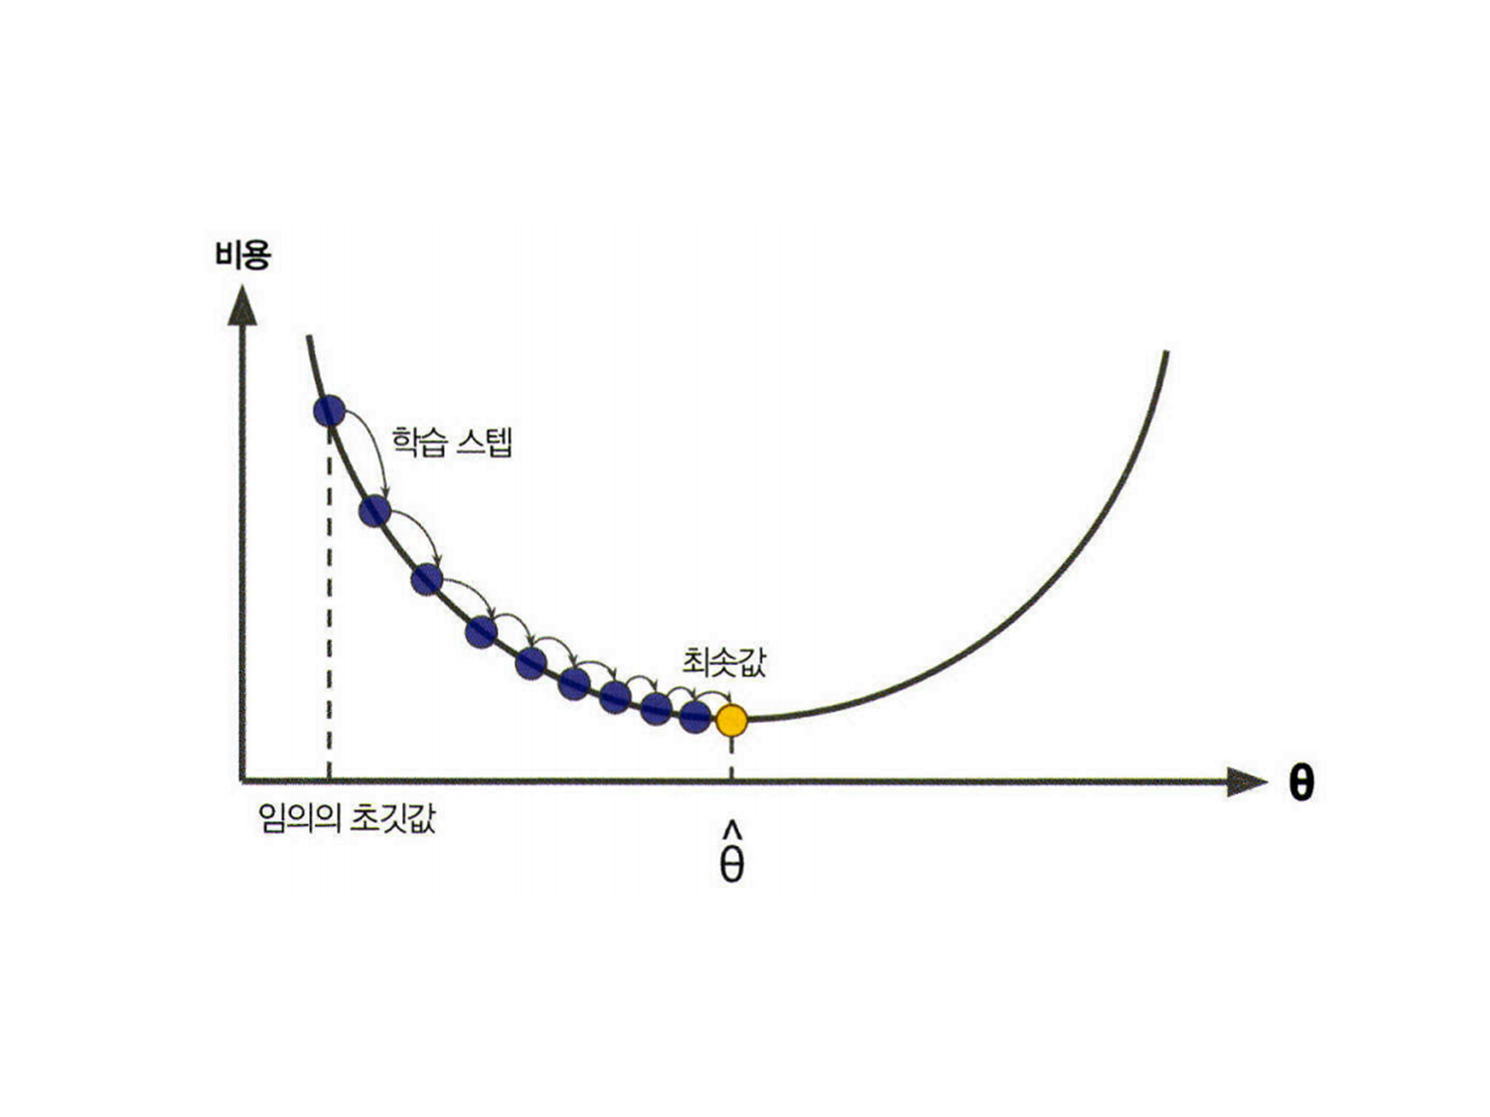

    경사 하강법에서 중요한 파라미터는 step의 크기로 학습률(learning rate) 하이퍼파라미터로 결정 된다. 학습률이 너무 작으면 알고지름이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다.

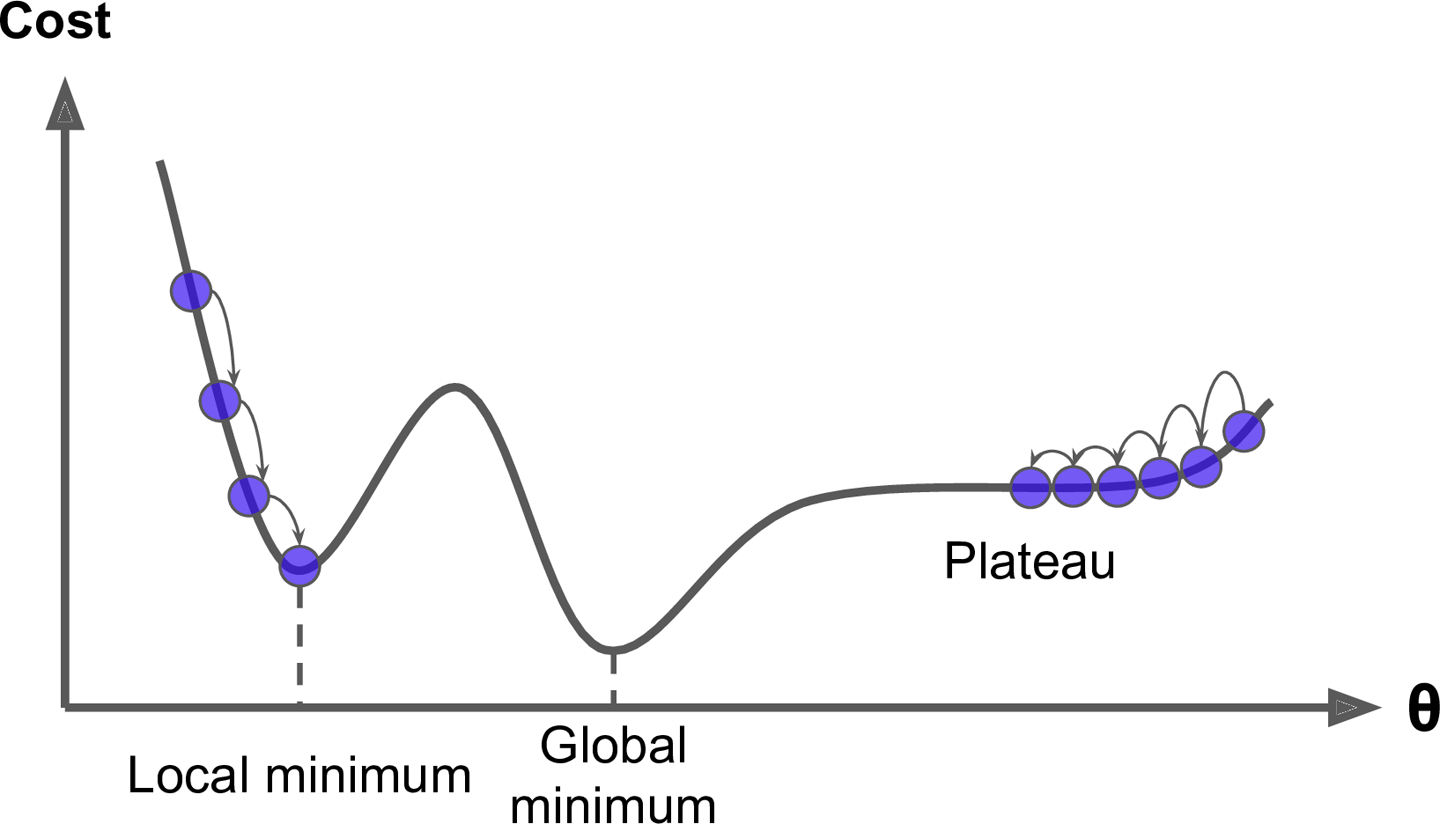


모든 비용함수가 매끈한 그릇과 같지는 않다. 위 그림은 경사하강법의 두가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimium)보다 덜 좋은 지역 최솟값(local minumum)에 수렴한다.   

알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다. 

선형 회귀를 위한 MSE 비용함수는 곡선에서 어떤 두점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수(convex function)이다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 이 두 사실로 부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다. 

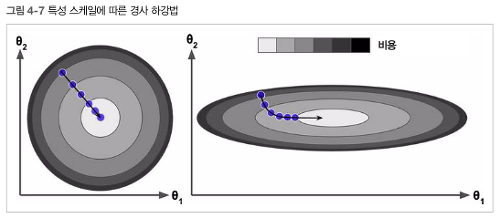

    위의 그림에서 볼 수 있듯이 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다. 반면에 오른쪽 그래프는 처음엔 전역 최솟ㄱ밧의 방향에 거의 직각으로 향하다가 평평한 골짜기를 돌아서 나간다. 결국 최솟값에 도달하겠지만 시간이 오래 걸릴것이다. 
    
    

    경사하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다. 그렇지 않으면 수렴하는데 휠씬 오랜시간이 소요
  

### 배치 경사 하강법 
경사 하강법을 구현하려면 각 모델 파라미터 세타j에 대해 비용함수의 기울기를 계산해야 한다. 세타j가 조금 변경될때 비용함수가 얼마나 바뀌는지 계산해야한다. 을 **편도함수(partial derivative)** 라고한다.  


**비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식  경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

공식은 매 경사 하강법 스템에서 전체 훈련세트 X에 대해 계산한다. 그래서 이 알고리즘을 **배치 경사 하강법**이라고 한다. 즉 매 스템에서 훈련데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련세트에서는 아주 느리다. 그러나 경사하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형회귀를 훈련시키려면 정규방정식이나 SVD분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

In [20]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[3.77981228],
       [3.2365191 ]])

In [22]:
X_new_b.dot(theta)

array([[ 3.77981228],
       [10.25285047]])

    정규방정식으로 찾은 값과 같다.

In [23]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

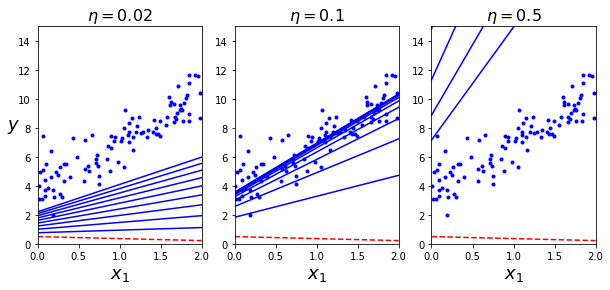

In [24]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

    왼쪽의 학습률이 너무 낮다. 알고리즘은 최적점에 도달하지겠지만 시간이 오래 걸릴것이다.   
    가운데는 학습률이 적당하다. 반복 몇번 만에 이미 최적점에 수렴한다.   
    오른쪽으로 학습률이 너무 높다. 알고리즘이 산발적으로 스템마다 최적점에서 점점 더 멀어져 발산한다.  
    
    적절한 학습률을 찾기 위해서는 그리스 탐색을 사용한다. 하지만 그리스 탐색에서 수렴하는데 너무 오래 걸리는 모델을 막기 휘해 반복횟수를 제한한다.
    반복횟수는 어떻게 지정할까? 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다. 너무크면 모델파라미터가 더는 변하지 않는 동안 시간을 낭비한다
    해결책은 반복횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면 , 즉 벡터의 노름이 어떤 값(허용오차) 보다 작아지면 경사 하강법이 최솟값에 도달한 것으로 알고리즘을 중단한다.